In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
#from day_1 import mean_CI_model, mean_CI_data, mean_PI_model, mean_PI_data
import pandas.plotting as pd_plot
import scipy as sc


## Exercise 5.1
Consider the data on PEFR, height and, sex we looked at during today’s lecture,
PEFR.dta. We will start by looking at the men only (i.e. discard the women) and mimic
the analysis done for the women presented in the lectures.
1. Make a scatter plot of PEFR against height with a fitted line.
Comment on what you see.
 - We can see that the data is very scattered, but it seems to
 follow an increasing  PERF with height

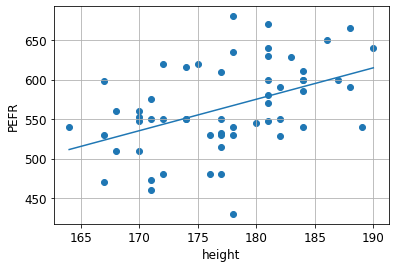

In [6]:
PEFR = pd.read_csv('data/PEFR.csv', sep=',', na_values=".")
PEFR_male = PEFR.loc[PEFR['sex'] == 'male']

# linear regression fit
slope, intercept, r_value, p_value, std_err = stats.linregress(PEFR_male['height'],PEFR_male['PEFR'])

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1, 1)
ax.scatter(PEFR_male['height'], PEFR_male['PEFR'])
x = np.linspace(np.amin(PEFR_male['height']), np.amax(PEFR_male['height']))
ax.plot(x, slope*x+intercept)
ax.set_ylabel('PEFR')
ax.set_xlabel('height')
ax.grid()
plt.show()


2. Fit the regression line of PEFR on height. What is the estimated slope, intercept and
the standard deviation of the unexplained variation?

In [8]:
X = sm.add_constant(PEFR_male['height']) 
Y = PEFR_male['PEFR']
model_male = sm.OLS(Y, X).fit()
print(model_male.summary())

residuals

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.25
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           0.000394
Time:                        13:40:18   Log-Likelihood:                -303.30
No. Observations:                  57   AIC:                             610.6
Df Residuals:                      55   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -140.3875    186.771     -0.752      0.4

3. Generate a new variable height170=height-170 and fit the regression line of PEFR
on height170. What is the estimated slope, intercept and the standard deviation of the
unexplained variation?
Compare with what you found in 2.
What is the interpretation of the intercept?
Is the slope statistically significant different from zero?



### 5.1.4) Generate the predicted values and the residuals under this model. Make a plot of the residuals against the predicted values and the residuals against height170. Comment on what you see.

### 5.1.5) Make a QQ-plot of the residuals. Comment on what you see. We will now look at both sexes.

### 5.1.6) Run the commands regress PEFR b1.sex##c.height170 regress PEFR b2.sex##c.height170 and compare with model 2 in the lecture notes.

### 5.1.7) Run the commands: regress PEFR b1.sex c.height170 lincom _cons + 2.sex and compare with model 3 in the lecture notes.